In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

(<Axes: title={'center': 'gamma = 1/3'}>,
 Text(0.5, 1.0, 'gamma = 1/3'))

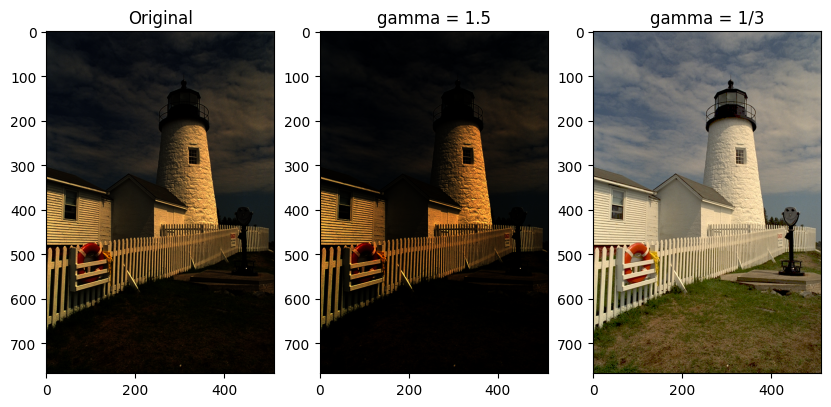

In [14]:
def gamma_correction(img, gamma):
    # rows, cols, channels = img.shape
    # out = np.zeros_like(img)
    # for r in range(rows):
    #     for c in range(cols):
    #         for ch in range(channels):
    #             out[r, c, ch] = img[r, c , ch]**gamma
    # return out
    return img ** gamma

img = cv2.imread('data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(gamma_correction(img, gamma=1.5)), plt.title('gamma = 1.5')
plt.subplot(133), plt.imshow(gamma_correction(img, gamma=1/3)), plt.title('gamma = 1/3')

(<Axes: xlabel='input', ylabel='output'>,
 Text(0.5, 0, 'input'),
 Text(0, 0.5, 'output'),
 None)

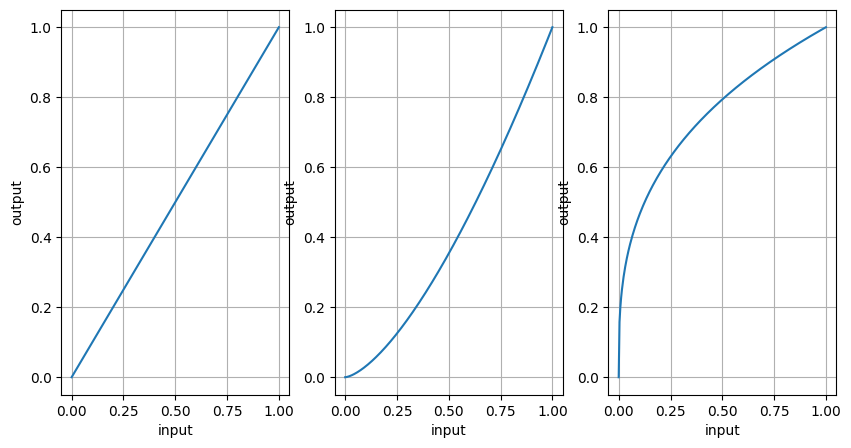

In [16]:
colors = np.arange(0, 256)/255
plt.subplot(131), plt.plot(colors, colors**1), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)
plt.subplot(132), plt.plot(colors, colors**1.5), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)
plt.subplot(133), plt.plot(colors, colors**(1/3)), plt.xlabel('input'), plt.ylabel('output'), plt.grid(True)

(Text(0.5, 0, 'input'),
 Text(0, 0.5, 'output'),
 None,
 Text(0.5, 1.0, 'Human Eye'))

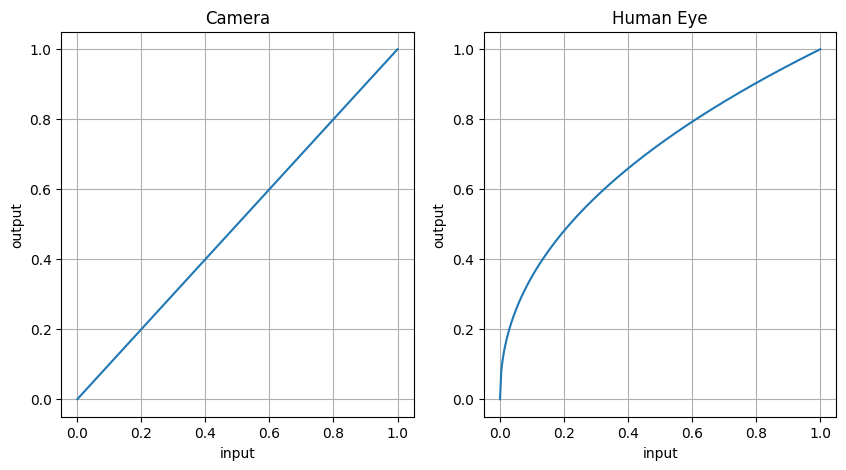

In [18]:
plt.subplot(121), plt.plot(colors, colors)
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Camera')

plt.subplot(122), plt.plot(colors, colors**(1/2.2))
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Human Eye')

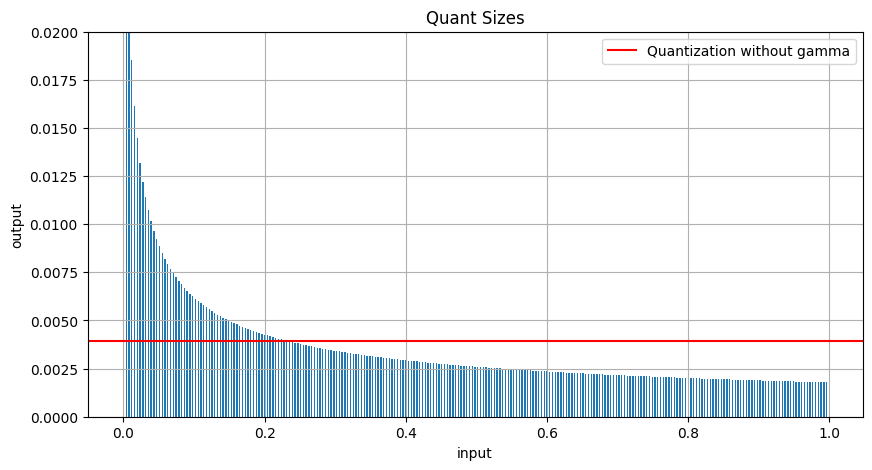

In [20]:
quants = colors**(1/2.2)
quants = quants[1:] - quants[0:-1]

plt.bar(colors[0:-1], quants, width=1/512), plt.ylim([0, 0.02])
plt.axhline(y=1/255, color='r', linestyle='-', label='Quantization without gamma')
plt.xlabel('input'), plt.ylabel('output'), plt.grid(True), plt.title('Quant Sizes')
plt.legend()